In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')
from scipy import stats
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# 데이터 확인

In [2]:
df=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/Car.csv", encoding='euc-kr')
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [4]:
df.shape

(7253, 13)

In [5]:
df.describe() 

,Price,Year,Kilometers_Driven,Seats
count,6200.000000,7253.000000,7.253000e+03,7200.000000
mean,14912.514750,2013.365366,5.869906e+04,5.279722
std,17674.318464,3.254421,8.442772e+04,0.811660
min,7.080000,1996.000000,1.710000e+02,0.000000
25%,5365.360000,2011.000000,3.400000e+04,5.000000
50%,8814.520000,2014.000000,5.341600e+04,5.000000
75%,15869.972500,2016.000000,7.300000e+04,5.000000
max,245273.600000,2019.000000,6.500000e+06,10.000000


In [6]:
df.isnull().sum() 

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

# 결측치 처리

In [7]:
df['Mileage'] = df['Mileage'].str.split(' ').str[0]
df['Engine'] = df['Engine'].str.split(' ').str[0]
df['Power'] = df['Power'].str.split(' ').str[0]

df.replace("null",np.nan,inplace=True)
df['Mileage'] = df['Mileage'].astype('float64')
df['Engine'] = df['Engine'].astype('float64')
df['Power'] = df['Power'].astype('float64')

In [8]:
df.isnull().sum() # 열별 결측치를 보았습니다.

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
dtype: int64

In [9]:
df= df.drop(['New_Price'],axis=1) # New_Price 변수는 결측치가 너무 많아 제거하였습니다.

In [10]:
df= df.dropna(subset=['Price']) # Price는 목표변수이므로 결측치를 대체하면 데이터가 변질될 수 있으므로 결측 행을 제거해주었습니다.

In [11]:
df[df['Mileage'].isnull()] # 마일리지 결측행 확인

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
4446,Mahindra E Verito D4,Chennai,19928.48,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0
4904,Toyota Prius 2009-2016 Z4,Mumbai,19545.24,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0


In [12]:
df[df['Name']=='Mahindra E Verito D4'] 
# 결측행과 같은 모델이 존재한다면, 같은 모델의 mileage 로 대체해주려고 했지만 존재하지않아서 결측행 제거해주겠습니다.

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
4446,Mahindra E Verito D4,Chennai,19928.48,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0


In [13]:
df[df['Name']=='Toyota Prius 2009-2016 Z4']
# 결측행과 같은 모델이 존재한다면, 같은 모델의 mileage 로 대체해주려고 했지만 존재하지않아서 결측행 제거해주겠습니다.

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
4904,Toyota Prius 2009-2016 Z4,Mumbai,19545.24,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0


In [14]:
df= df.dropna(subset=['Mileage']) # Mileage에 결측행 제거하였습니다.

In [15]:
df.isnull().sum()  # 결측치를 열별로 한번더 보았습니다.

Name                   0
Location               0
Price                  0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                36
Power                143
Seats                 42
dtype: int64

In [16]:
df = df.groupby('Name', group_keys=True).apply(lambda group: group.fillna(method='bfill').fillna(method='ffill'))

In [17]:
df = df.reset_index(drop=True)

In [18]:
df[df['Power'].isnull()].head(5) # 마일리지 결측행 확인

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
60,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,27593.28,2012,125000,Petrol,Automatic,First,10.50,3197.0,NaN,0.0
399,BMW 5 Series 520d Sedan,Kochi,27424.65,2014,64158,Diesel,Automatic,First,18.48,NaN,NaN,NaN
400,BMW 5 Series 520d Sedan,Pune,27593.28,2012,95000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN
401,BMW 5 Series 520d Sedan,Mumbai,16096.08,2008,81000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN
402,BMW 5 Series 520d Sedan,Delhi,22227.92,2012,90000,Diesel,Automatic,First,18.48,NaN,NaN,NaN


In [19]:
df[df['Engine'].isnull()].head(5)# 마일리지 결측행 확인

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
399,BMW 5 Series 520d Sedan,Kochi,27424.65,2014,64158,Diesel,Automatic,First,18.48,NaN,NaN,NaN
400,BMW 5 Series 520d Sedan,Pune,27593.28,2012,95000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN
401,BMW 5 Series 520d Sedan,Mumbai,16096.08,2008,81000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN
402,BMW 5 Series 520d Sedan,Delhi,22227.92,2012,90000,Diesel,Automatic,First,18.48,NaN,NaN,NaN
403,BMW 5 Series 520d Sedan,Delhi,21231.50,2012,72000,Diesel,Automatic,Third,18.48,NaN,NaN,NaN


In [20]:
df= df.dropna(subset=['Engine','Power','Seats'])

In [21]:
df.isnull().sum() 

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [22]:
df.shape

(6084, 12)

# 파생변수

In [23]:
df[['Brand', 'Model']] = df['Name'].str.split(pat=' ', n=1, expand=True)

In [24]:
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,Ambassador Classic Nova Diesel,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,Ambassador,Classic Nova Diesel
1,Audi A3 35 TDI Attraction,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,Audi,A3 35 TDI Attraction
2,Audi A3 35 TDI Premium,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,Audi,A3 35 TDI Premium
3,Audi A3 35 TDI Premium Plus,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,Audi,A3 35 TDI Premium Plus
4,Audi A3 35 TDI Technology,Delhi,34491.60,2017,22000,Diesel,Automatic,Second,20.38,1968.0,143.0,5.0,Audi,A3 35 TDI Technology


In [25]:
df= df.drop(['Name'],axis=1) 

In [26]:
df["Age"]= 2023- df["Year"]

In [27]:
df= df.drop(['Year'],axis=1) 

# 이상치

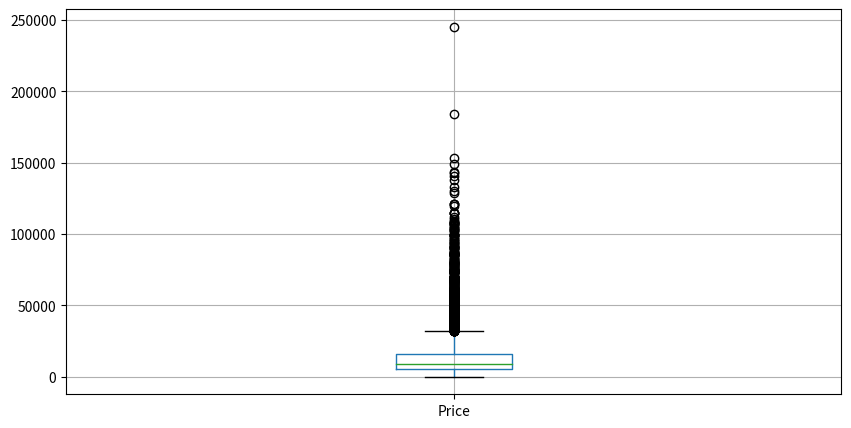

In [28]:
df.boxplot(column=["Price"],figsize=(10,5))
plt.show()

In [29]:
df.sort_values(ascending=False, by="Price").head()

,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Age
2850,Hyderabad,245273.60,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,Land,Rover Range Rover 3.0 Diesel LWB Vogue,6
2808,Delhi,183955.20,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,Lamborghini,Gallardo Coupe,12
2746,Hyderabad,153296.00,8000,Petrol,Automatic,First,12.50,5000.0,488.1,2.0,Jaguar,F Type 5.0 V8 S,8
2864,Kochi,148804.43,26013,Diesel,Automatic,First,12.65,2993.0,255.0,5.0,Land,Rover Range Rover Sport SE,4
435,Coimbatore,143592.36,28060,Petrol,Automatic,First,12.05,2979.0,320.0,5.0,BMW,7 Series 740Li,5


In [30]:
df.sort_values(ascending=True, by="Price").head()

,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Age
1818,Kochi,7.08,23955,Petrol,Manual,First,18.6,1197.0,81.86,5.0,Hyundai,Elite i20 Magna Plus,5
5339,Pune,674.50,65000,Petrol,Manual,Second,26.0,624.0,35.00,4.0,Tata,Nano Lx,12
4393,Jaipur,689.83,95150,Petrol,Manual,Third,17.3,993.0,60.00,5.0,Maruti,Zen LXI,25
3161,Jaipur,689.83,12000,Petrol,Manual,Second,16.1,796.0,37.00,4.0,Maruti,800 Std BSIII,19
1835,Pune,689.83,86000,Petrol,Manual,Second,15.3,1341.0,83.00,5.0,Hyundai,Getz GLS,18


In [31]:
df = df.drop(df[df['Price'] == 7.08].index)

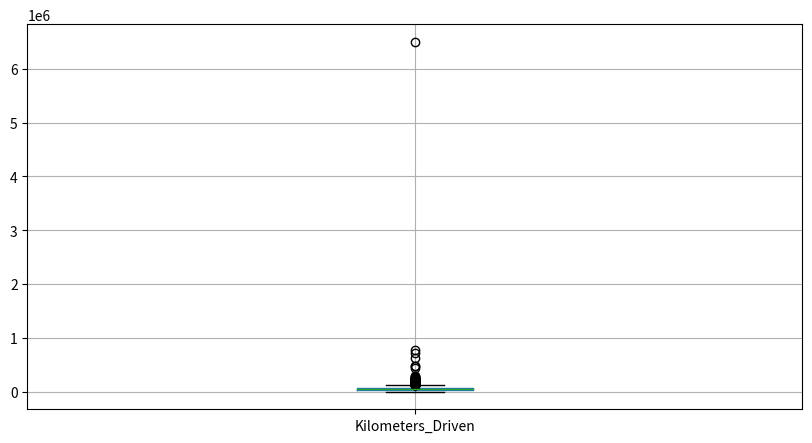

In [32]:
df.boxplot(column=["Kilometers_Driven"],figsize=(10,5))
plt.show()

In [33]:
df.sort_values(ascending=False, by="Kilometers_Driven").head()

,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Age
504,Chennai,99642.40,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,BMW,X5 xDrive 30d M Sport,6
5108,Kolkata,11497.20,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,Skoda,Octavia Ambition Plus 2.0 TDI AT,10
6124,Chennai,9044.46,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,Volkswagen,Vento Diesel Highline,10
2400,Chennai,4138.99,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,Hyundai,i10 Magna 1.2,14
5899,Chennai,19928.48,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,Volkswagen,Jetta 2013-2015 2.0L TDI Highline AT,8


In [34]:
df.sort_values(ascending=True, by="Kilometers_Driven").head(5)

,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Age
3197,Mumbai,5518.66,171,Petrol,Manual,First,24.70,796.0,47.30,5.0,Maruti,Alto 800 2016-2019 VXI,4
4374,Mumbai,9581.00,600,Petrol,Automatic,First,21.50,1197.0,81.80,5.0,Maruti,Wagon R ZXI AMT 1.2,4
5408,Jaipur,11497.20,1000,Diesel,Manual,First,13.49,2179.0,138.03,5.0,Tata,Xenon XT EX 4X2,6
2747,Delhi,61318.40,1000,Diesel,Automatic,First,13.60,1999.0,177.00,5.0,Jaguar,XE 2.0L Diesel Prestige,5
1851,Kolkata,9964.24,1000,Petrol,Manual,First,18.90,1197.0,81.86,5.0,Hyundai,Grand i10 1.2 Kappa Asta,4


In [35]:
df = df.drop(df[df['Kilometers_Driven'] == 6500000].index)

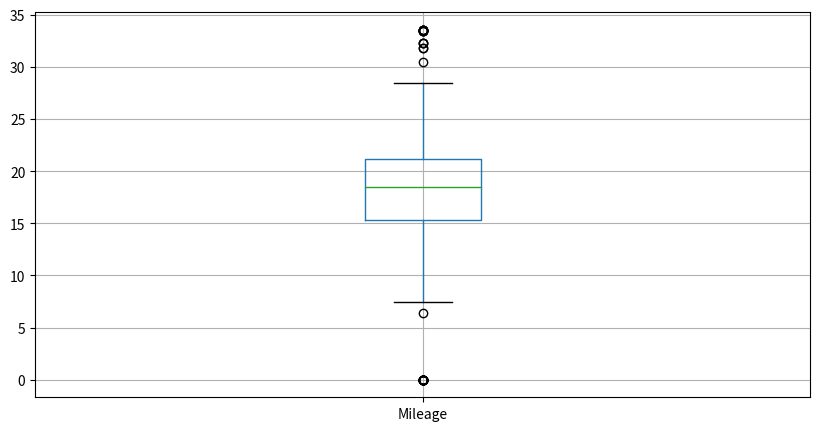

In [36]:
df.boxplot(column=["Mileage"],figsize=(10,5))
plt.show()

In [37]:
df.sort_values(ascending=False, by="Mileage").head(5)

,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Age
4218,Pune,4537.56,79494,CNG,Manual,First,33.54,998.0,67.04,5.0,Maruti,Wagon R CNG LXI,10
4219,Mumbai,4675.53,54000,CNG,Manual,First,33.54,998.0,67.04,5.0,Maruti,Wagon R CNG LXI,10
4220,Pune,5978.54,29202,CNG,Manual,First,33.54,998.0,67.04,5.0,Maruti,Wagon R CNG LXI,9
4221,Delhi,4982.12,74663,CNG,Manual,First,33.54,998.0,67.04,5.0,Maruti,Wagon R CNG LXI,9
4222,Mumbai,4368.94,47200,CNG,Manual,First,33.54,998.0,67.04,5.0,Maruti,Wagon R CNG LXI,9


In [38]:
df.sort_values(ascending=True, by="Mileage").head(5)

,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Age
5188,Hyderabad,9197.76,54000,Petrol,Automatic,First,0.0,3597.0,262.6,5.0,Skoda,Superb 3.6 V6 FSI,13
2837,Hyderabad,25677.08,139000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,Land,Rover Freelander 2 TD4 SE,11
2836,Hyderabad,39856.96,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,Land,Rover Freelander 2 TD4 SE,10
5189,Hyderabad,7281.56,53000,Petrol,Automatic,First,0.0,3597.0,262.6,5.0,Skoda,Superb 3.6 V6 FSI,14
2835,Jaipur,25293.84,119203,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,Land,Rover Freelander 2 TD4 SE,11


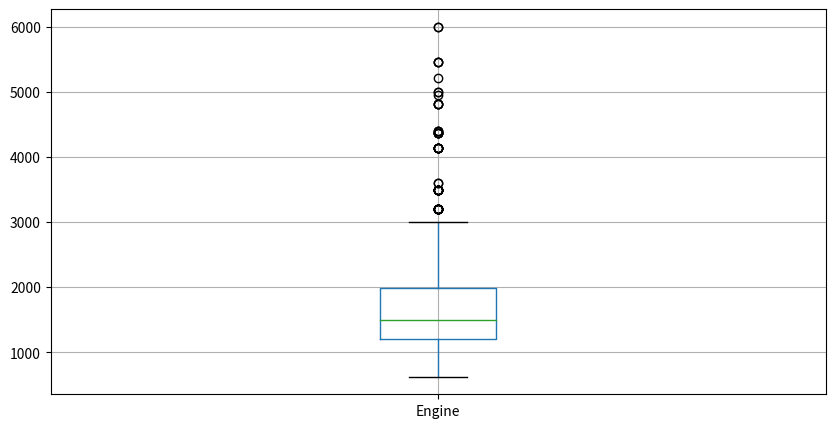

In [39]:
df.boxplot(column=["Engine"],figsize=(10,5))
plt.show()

In [40]:
df.sort_values(ascending=False, by="Engine").head(5)

,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Age
516,Bangalore,5748.60,31200,Petrol,Automatic,Second,10.20,5998.0,616.0,5.0,Bentley,Flying Spur W12,15
515,Hyderabad,90444.64,48000,Petrol,Automatic,First,8.60,5998.0,552.0,4.0,Bentley,Continental Flying Spur,17
4716,Kolkata,45988.80,35277,Petrol,Automatic,First,7.81,5461.0,362.9,5.0,Mercedes-Benz,S Class 2005 2013 S 500,13
4722,Kolkata,45222.32,35000,Petrol,Automatic,First,8.10,5461.0,387.3,2.0,Mercedes-Benz,SL-Class SL 500,13
4726,Bangalore,137966.40,3000,Petrol,Automatic,Second,12.00,5461.0,421.0,2.0,Mercedes-Benz,SLK-Class 55 AMG,9


In [41]:
df.sort_values(ascending=True, by="Engine").head(5)

,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Age
5349,Coimbatore,3265.20,25811,Petrol,Manual,Second,25.4,624.0,37.50,4.0,Tata,Nano Twist XT,8
5340,Coimbatore,2667.35,37287,Petrol,Manual,First,26.0,624.0,35.00,4.0,Tata,Nano Lx,10
5341,Chennai,2452.74,35000,Petrol,Manual,First,25.4,624.0,37.48,4.0,Tata,Nano Lx BSIV,12
5342,Kochi,2115.48,4187,Petrol,Manual,First,26.0,624.0,35.00,4.0,Tata,Nano Lx BSIV,11
5343,Jaipur,812.47,80000,Petrol,Manual,Second,25.4,624.0,37.50,4.0,Tata,Nano STD SE,11


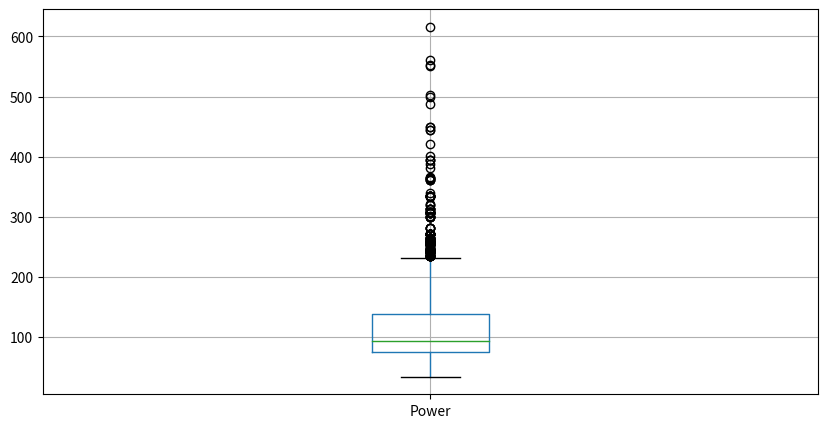

In [42]:
df.boxplot(column=["Power"],figsize=(10,5))
plt.show()

In [43]:
df.sort_values(ascending=False, by="Power").head(5)

,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Age
516,Bangalore,5748.60,31200,Petrol,Automatic,Second,10.2,5998.0,616.0,5.0,Bentley,Flying Spur W12,15
2808,Delhi,183955.20,6500,Petrol,Automatic,Third,6.4,5204.0,560.0,2.0,Lamborghini,Gallardo Coupe,12
515,Hyderabad,90444.64,48000,Petrol,Automatic,First,8.6,5998.0,552.0,4.0,Bentley,Continental Flying Spur,17
4894,Mumbai,49054.72,35000,Petrol,Automatic,Second,11.9,4806.0,550.0,5.0,Porsche,Cayenne Turbo S,13
2788,Coimbatore,77659.75,43686,Petrol,Automatic,First,10.5,5000.0,503.0,4.0,Jaguar,XJ 5.0 L V8 Supercharged,12


In [44]:
df.sort_values(ascending=True, by="Power").head(5)

,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Age
3692,Jaipur,2452.74,126000,Petrol,Manual,First,16.8,796.0,34.2,5.0,Maruti,Omni MPI STD BSIV,11
3690,Kolkata,2299.44,23000,Petrol,Manual,First,16.8,796.0,34.2,5.0,Maruti,Omni MPI CARGO BSIV,8
3691,Coimbatore,5488.00,15473,Petrol,Manual,First,16.8,796.0,34.2,5.0,Maruti,Omni MPI STD BSIV,6
3688,Jaipur,3602.46,15000,Petrol,Manual,First,16.8,796.0,34.2,8.0,Maruti,Omni E MPI STD BS IV,8
3687,Mumbai,3449.16,11734,Petrol,Manual,First,16.8,796.0,34.2,8.0,Maruti,Omni E MPI STD BS IV,10


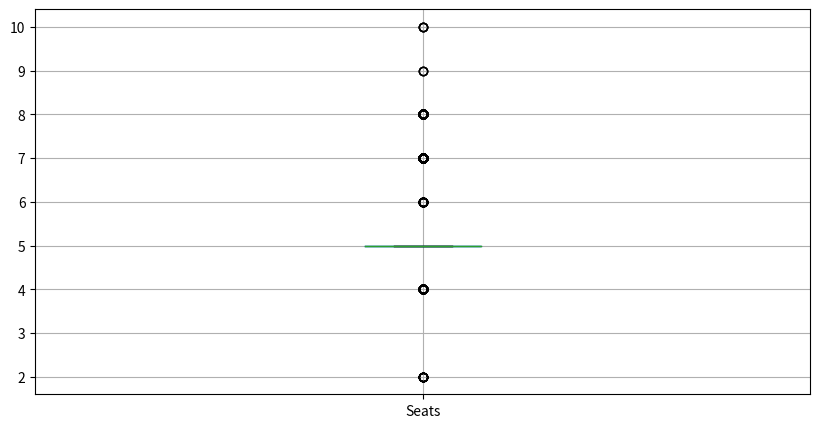

In [45]:
df.boxplot(column=["Seats"],figsize=(10,5))
plt.show()

In [46]:
df.sort_values(ascending=False, by="Seats").head(5)

,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Age
5379,Mumbai,8048.04,20000,Diesel,Manual,First,14.07,1978.0,83.1,10.0,Tata,Sumo DX,10
5853,Bangalore,5595.30,63000,Diesel,Manual,Third,13.10,2446.0,75.0,10.0,Toyota,Qualis FS B3,21
5852,Pune,5365.36,77757,Diesel,Manual,Second,13.10,2446.0,75.0,10.0,Toyota,Qualis FS B2,19
636,Hyderabad,8431.28,120000,Diesel,Manual,First,14.80,2499.0,80.0,10.0,Chevrolet,Tavera LS B3 10 Seats BSIII,8
637,Kolkata,7281.56,67132,Diesel,Manual,First,13.58,2499.0,78.0,9.0,Chevrolet,Tavera LT 9 Str BS IV,11


In [47]:
df.sort_values(ascending=True, by="Seats").head(5)

,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Age
4728,Bangalore,84312.80,10000,Petrol,Automatic,First,18.1,3498.0,306.0,2.0,Mercedes-Benz,SLK-Class SLK 350,8
240,Kochi,41926.46,14262,Petrol,Automatic,First,9.9,1984.0,207.8,2.0,Audi,TT 2.0 TFSI,9
4887,Kolkata,98109.44,10512,Petrol,Automatic,First,8.6,2706.0,265.0,2.0,Porsche,Boxster S tiptronic,8
4727,Coimbatore,85140.60,22732,Petrol,Automatic,First,18.1,3498.0,306.0,2.0,Mercedes-Benz,SLK-Class SLK 350,7
4726,Bangalore,137966.40,3000,Petrol,Automatic,Second,12.0,5461.0,421.0,2.0,Mercedes-Benz,SLK-Class 55 AMG,9


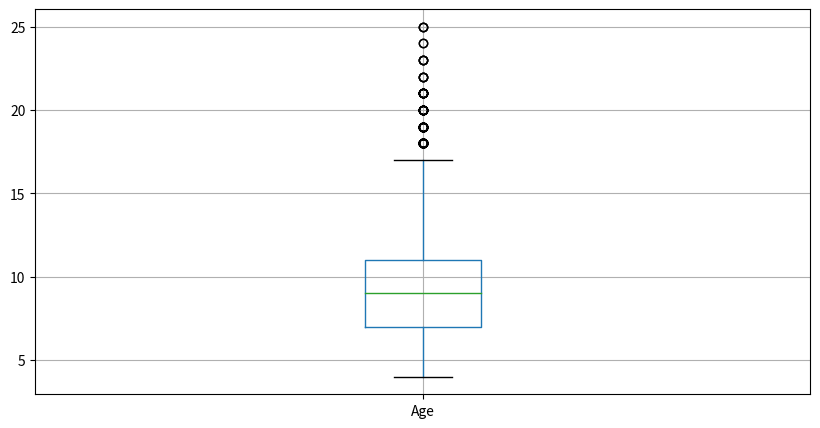

In [48]:
df.boxplot(column=["Age"],figsize=(10,5))
plt.show()

In [49]:
df.sort_values(ascending=True, by="Age").head(5)

,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Age
3291,Kolkata,6116.51,1000,Petrol,Manual,First,24.70,796.0,47.30,5.0,Maruti,Alto LXI,4
5584,Coimbatore,47291.82,28069,Diesel,Automatic,First,12.90,2755.0,174.50,7.0,Toyota,Fortuner 2.8 2WD AT,4
5583,Kochi,50786.96,21719,Diesel,Automatic,First,12.90,2755.0,174.50,7.0,Toyota,Fortuner 2.8 2WD AT,4
2274,Kochi,18211.56,12336,Petrol,Manual,First,17.00,1591.0,121.30,5.0,Hyundai,Verna VTVT 1.6 SX Option,4
2158,Coimbatore,12738.90,77240,Diesel,Automatic,First,22.32,1582.0,126.32,5.0,Hyundai,Verna 1.6 SX CRDI (O) AT,4


In [50]:
df.sort_values(ascending=False, by="Age").head(5)

,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Age
4498,Mumbai,5978.54,55300,Diesel,Automatic,First,10.0,1796.0,157.7,5.0,Mercedes-Benz,E-Class 250 D W 210,25
4393,Jaipur,689.83,95150,Petrol,Manual,Third,17.3,993.0,60.0,5.0,Maruti,Zen LXI,25
4392,Jaipur,812.47,95150,Petrol,Manual,Third,17.3,993.0,60.0,5.0,Maruti,Zen LX,25
1232,Pune,1379.66,140000,Petrol,Manual,First,13.0,1343.0,90.0,5.0,Honda,City 1.3 EXI,24
4399,Jaipur,1180.38,70000,Petrol,Manual,Second,17.3,993.0,60.0,5.0,Maruti,Zen VX,24


In [51]:
df['Brand'].value_counts()

Maruti           1229
Hyundai          1078
Honda             619
Toyota            420
Mercedes-Benz     323
Volkswagen        320
Ford              298
Mahindra          279
BMW               267
Audi              240
Tata              192
Skoda             181
Renault           151
Chevrolet         120
Nissan             93
Land               57
Jaguar             43
Mitsubishi         34
Mini               29
Fiat               26
Volvo              21
Jeep               19
Datsun             17
Porsche            16
ISUZU               3
Force               3
Bentley             2
Ambassador          1
Lamborghini         1
Name: Brand, dtype: int64

#  시각화

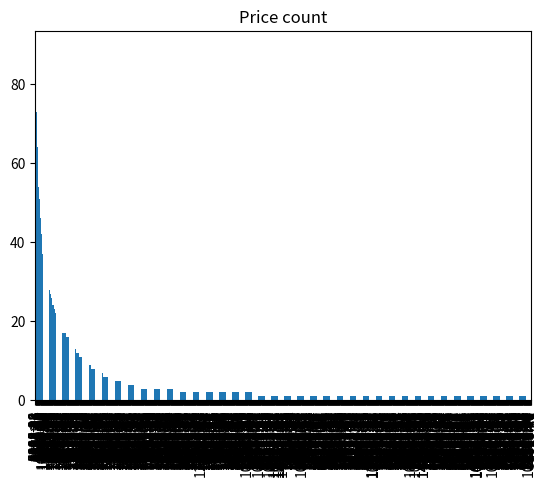

In [54]:
df_count1=df["Price"].value_counts()
df_count1.plot.bar()
plt.title('Price count')
plt.show()

In [55]:
sns.pairplot(df)

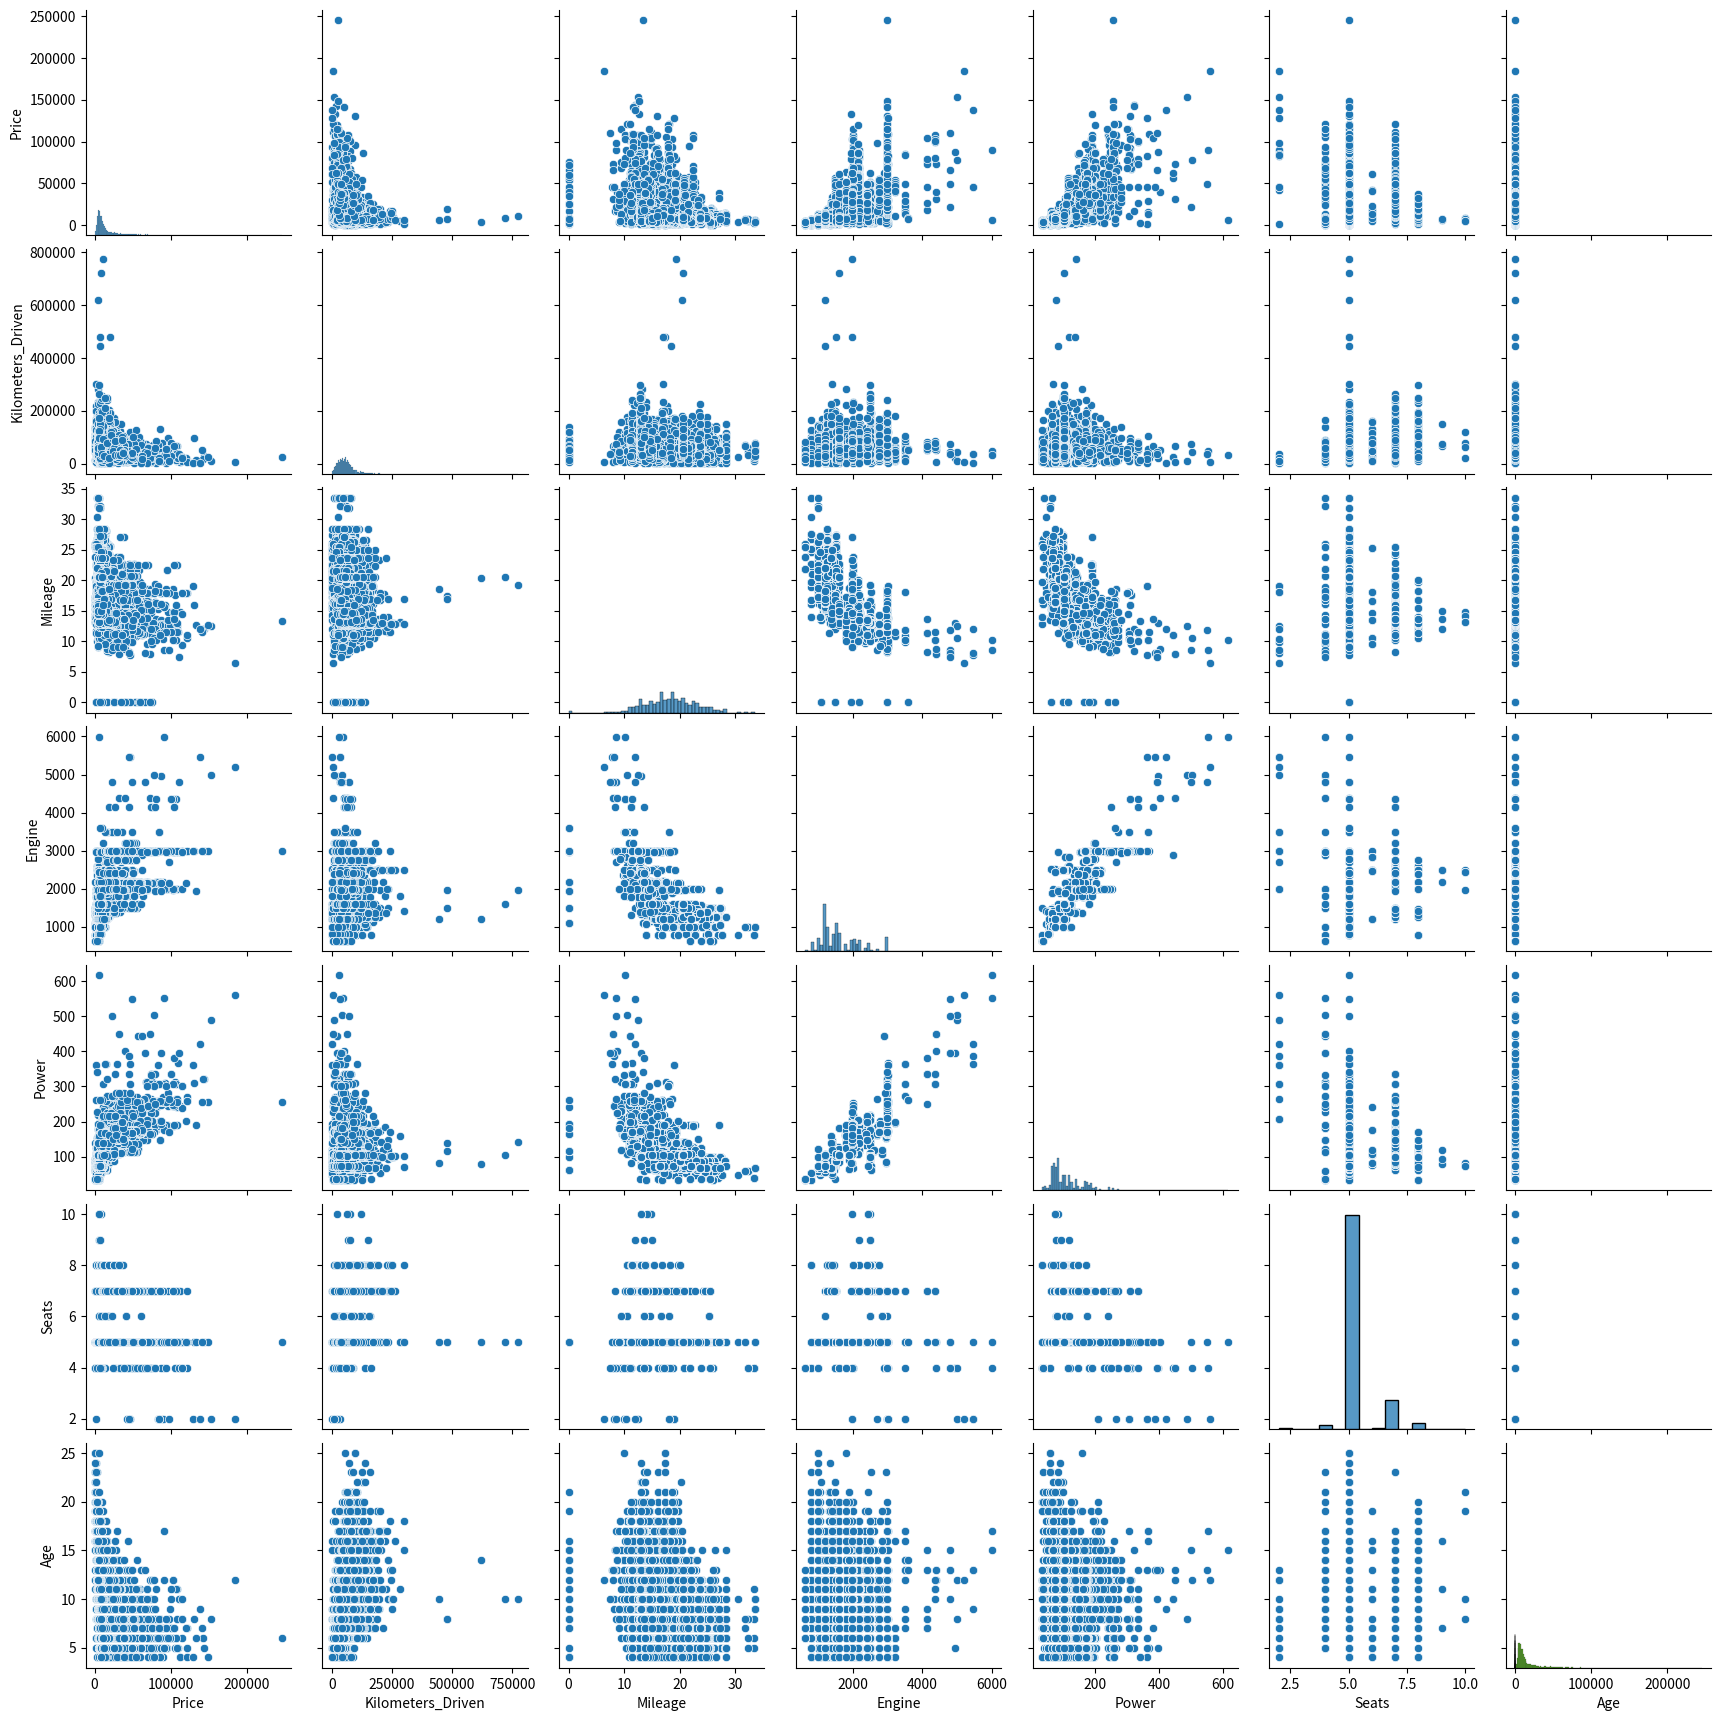

In [57]:
sns.histplot(df["Price"])
plt.show()

# 가설 검정 : 지역별 중고 차량 가격 검정 

In [52]:
df['Location'].value_counts()

Mumbai        804
Hyderabad     738
Kochi         669
Coimbatore    659
Pune          611
Delhi         566
Kolkata       542
Chennai       490
Jaipur        414
Bangalore     359
Ahmedabad     230
Name: Location, dtype: int64

In [53]:
groups = [df[df['Location'] == location]['Price'] for location in df['Location'].unique()]

# ANOVA 검정을 수행합니다.
anova_result = stats.f_oneway(*groups)

In [54]:
print("ANOVA 검정 결과:")
print("검정 통계량 (F-value):", anova_result.statistic)
print("p-value:", anova_result.pvalue)


ANOVA 검정 결과:
검정 통계량 (F-value): 38.34486468655015
p-value: 8.196424841467488e-74


In [55]:
if anova_result.pvalue < 0.05:
    print("p-value가 0.05보다 작으므로, 지역별 차량 가격이 유의미하게 다릅니다.")
else:
    print("p-value가 0.05 이상이므로, 지역별 차량 가격이 유의미하게 다르지 않습니다.")

p-value가 0.05보다 작으므로, 지역별 차량 가격이 유의미하게 다릅니다.


In [56]:
print("정규성 검정 결과:")
for i, group in enumerate(groups):
    stat, p_value = stats.shapiro(group)
    print(f"지역 '{df['Location'].unique()[i]}'의 p-value: {p_value:.4f}")

# 등분산성 검정 (Levene Test 사용)
print("\n등분산성 검정 결과:")
stat, p_value = stats.levene(*groups)
print(f"p-value: {p_value:.4f}")

정규성 검정 결과:
지역 'Chennai'의 p-value: 0.0000
지역 'Mumbai'의 p-value: 0.0000
지역 'Delhi'의 p-value: 0.0000
지역 'Kolkata'의 p-value: 0.0000
지역 'Hyderabad'의 p-value: 0.0000
지역 'Kochi'의 p-value: 0.0000
지역 'Ahmedabad'의 p-value: 0.0000
지역 'Bangalore'의 p-value: 0.0000
지역 'Coimbatore'의 p-value: 0.0000
지역 'Pune'의 p-value: 0.0000
지역 'Jaipur'의 p-value: 0.0000

등분산성 검정 결과:
p-value: 0.0000


# 가설 검정 : 제조사별로 중고차 가격 검정

In [65]:
brand_groups = [df[df['Brand'] == brand]['Price'] for brand in df['Brand'].unique()]
brand_groups

[0    2069.5
 Name: Price, dtype: float64,
 1      25293.84
 2      29509.48
 3      28972.94
 4      34491.60
 5      13030.16
          ...   
 237    56719.52
 238    62084.88
 239    45222.32
 240    41926.46
 241    53653.60
 Name: Price, Length: 240, dtype: float64,
 242    26397.57
 243    24527.36
 244    26060.32
 245    17276.46
 246    15789.49
          ...   
 510    65150.80
 511    33571.82
 512    62330.15
 513    45988.80
 514    89739.48
 Name: Price, Length: 267, dtype: float64,
 515    90444.64
 516     5748.60
 Name: Price, dtype: float64,
 517    1839.55
 518    2759.33
 519    2146.14
 520    1149.72
 521    3219.22
         ...   
 633    2146.14
 634    2682.68
 635    2682.68
 636    8431.28
 637    7281.56
 Name: Price, Length: 120, dtype: float64,
 638     3832.40
 639     4138.99
 640     4752.18
 641     4982.12
 642     6055.19
 643    10270.83
 644     4583.55
 645     8799.19
 646     8477.27
 647     4752.18
 648     4215.64
 649     3449.16
 650     4

In [67]:
f_result = stats.f_oneway(*brand_groups)
f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way ANOVA")
print("F 통계량:{}".format(f))
print("p-value:{}".format(p))


One-way ANOVA
F 통계량:295.718
p-value:0.0


In [ ]:
# statistic,p= stats.shapiro(df['A'])
# print("statistic={}, p-value={}".format(statistic,p))

## 가설 검정 owner_type에 따라 중고차량 가격이 같다.

In [57]:
df["Owner_Type"] = df["Owner_Type"].replace({"first": 1, "second": 2, "third": 3})

In [58]:
groups = [df[df['Owner_Type'] == owner]['Price'] for owner in df['Owner_Type'].unique()]

# ANOVA 검정을 수행합니다.
anova_result = stats.f_oneway(*groups)

# ANOVA 결과를 출력합니다.
print("ANOVA 검정 결과:")
print("검정 통계량 (F-value):", anova_result.statistic)
print("p-value:", anova_result.pvalue)

# p-value를 통해 결과를 해석합니다.
if anova_result.pvalue < 0.05:
    print("p-value가 0.05보다 작으므로, 중고차량의 횟수에 따라 가격이 유의미하게 다릅니다.")
else:
    print("p-value가 0.05 이상이므로, 중고차량의 횟수에 따라 가격이 유의미하게 다르지 않습니다.")


ANOVA 검정 결과:
검정 통계량 (F-value): 18.457253899565238
p-value: 6.455370608241317e-12
p-value가 0.05보다 작으므로, 중고차량의 횟수에 따라 가격이 유의미하게 다릅니다.


# 상관분석 

In [125]:
correlation_matrix = df.corr().round(3)

/tmp/ipykernel_26679/261510015.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(3)


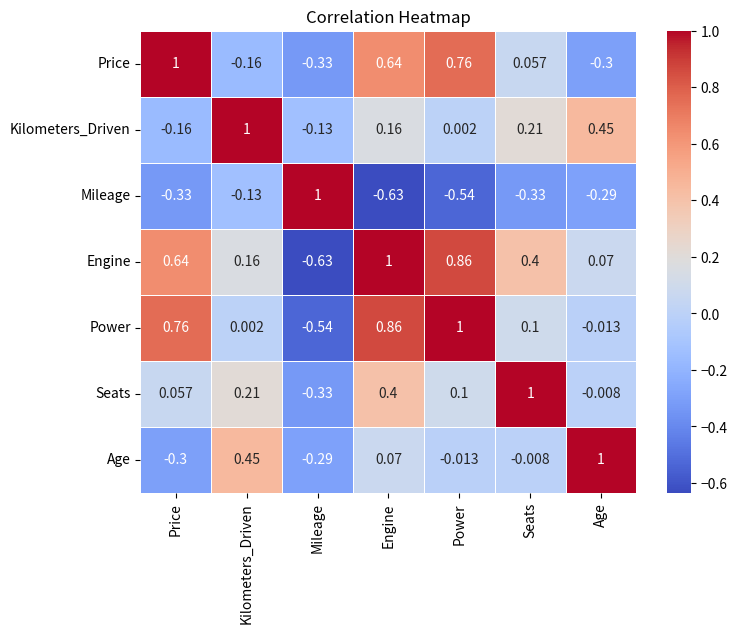

In [126]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 선형 회귀분석

In [127]:
df_lr = pd.get_dummies(df, columns=['Transmission','Fuel_Type'])

In [129]:
df_lr= df_raw.drop(['Location','Model','Brand'],axis=1) 

,Location,Price,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Model,Age,...,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,Chennai,2069.50,80000,Third,12.80,1489.0,35.5,5.0,Classic Nova Diesel,20,...,0,0,0,0,0,1,0,1,0,0
1,Chennai,25293.84,79271,First,20.38,1968.0,143.0,5.0,A3 35 TDI Attraction,9,...,0,0,0,0,1,0,0,1,0,0
2,Mumbai,29509.48,20003,First,20.38,1968.0,143.0,5.0,A3 35 TDI Premium,7,...,0,0,0,0,1,0,0,1,0,0
3,Mumbai,28972.94,39000,First,20.38,1968.0,143.0,5.0,A3 35 TDI Premium Plus,7,...,0,0,0,0,1,0,0,1,0,0
4,Delhi,34491.60,22000,Second,20.38,1968.0,143.0,5.0,A3 35 TDI Technology,6,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6193,Hyderabad,49821.20,100000,First,13.50,2400.0,215.0,5.0,XC60 D5,8,...,0,0,0,1,1,0,0,1,0,0
6194,Ahmedabad,18395.52,173000,First,13.50,2400.0,215.0,5.0,XC60 D5,12,...,0,0,0,1,1,0,0,1,0,0
6195,Kochi,26336.25,86925,First,11.20,2400.0,215.0,5.0,XC60 D5 Inscription,9,...,0,0,0,1,1,0,0,1,0,0
6196,Kochi,36147.20,102001,First,11.10,2400.0,200.0,7.0,XC90 2007-2015 D5 AT AWD,9,...,0,0,0,1,1,0,0,1,0,0


In [ ]:
df_lr["Owner_Type"] = df_lr["Owner_Type"].replace({"first": 1, "second": 2, "third": 3})

In [ ]:
df_lr.info()

In [ ]:
df_train, df_test = train_test_split(df_lr, test_size=0.3, random_state=6659)

In [ ]:
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

In [ ]:
reg_model=smf.ols(formula="Price ~ Kilometers_Driven+Owner_Type+Mileage+Engine+Power+Seats+Age", data=df_train)

In [ ]:
reg_result=reg_model.fit()
print(reg_result.summary())

In [ ]:
df_train_x=df_train.drop(['Price'], axis=1)
df_train_x_const= add_constant(df_train_x)
df_vif= pd.DataFrame()
df_vif["variable"]= df_train_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_train_x_const.values,i) 
               for i in range(df_train_x_const.shape[1])]


In [ ]:
df_vif.sort_values("VIF",ascending=True).round(2)